In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:


def frequency_table(df, column):
    """Creates and returns a frequency table for the specified column."""
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Frequency']
    return freq_table

def plot_bar_chart(freq_table, column):
    """Plots a bar chart for the frequency table of the specified column."""
    plt.figure(figsize=(10, 6))
    plt.bar(freq_table[column], freq_table['Frequency'], color='blue')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()   

def plot_scatter(df, column):
    """Plots a scatter plot for the specified column."""
    plt.subplot(1, 2, 2)  # Create a subplot for scatter plot
    plt.scatter(df.index, df[column], alpha=0.5, color='orange')
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid()

In [6]:

file_path = "../resources/data/output/online_retail_cleaned.csv"   
df = pd.read_csv(file_path)


**Descriptive Statistics**

In [16]:
# Select only numerical columns excluding CustomerID
numeric_data = df.select_dtypes(include='number')

numeric_data = numeric_data.drop(columns=['CustomerID'])

# Calculate descriptive statistics
descriptive_stats = numeric_data.describe()
descriptive_stats

,InvoiceNo,Quantity,UnitPrice,Year,Month,Day,TotalAmount
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,2010.934630,6.942118,15.704468,22.629195
std,13087.116747,181.588420,22.240725,0.247178,3.328213,8.047342,311.083465
min,536365.000000,1.000000,0.000000,2010.000000,1.000000,1.000000,0.000000
25%,549234.000000,2.000000,1.250000,2011.000000,4.000000,10.000000,4.950000
50%,561874.000000,6.000000,1.950000,2011.000000,7.000000,15.000000,12.390000
75%,572061.000000,12.000000,3.750000,2011.000000,10.000000,22.000000,19.800000
max,581587.000000,80995.000000,8142.750000,2011.000000,12.000000,31.000000,168469.600000


Frequency Table for 'Country':
                 Country  Frequency
0         United Kingdom     349227
1                Germany       9027
2                 France       8327
3                   EIRE       7228
4                  Spain       2480
5            Netherlands       2363
6                Belgium       2031
7            Switzerland       1842
8               Portugal       1453
9              Australia       1184
10                Norway       1072
11                 Italy        758
12       Channel Islands        747
13               Finland        685
14                Cyprus        603
15                Sweden        450
16               Austria        398
17               Denmark        380
18                Poland        330
19                 Japan        321
20                Israel        245
21           Unspecified        241
22             Singapore        222
23               Iceland        182
24                   USA        179
25                Canada        1

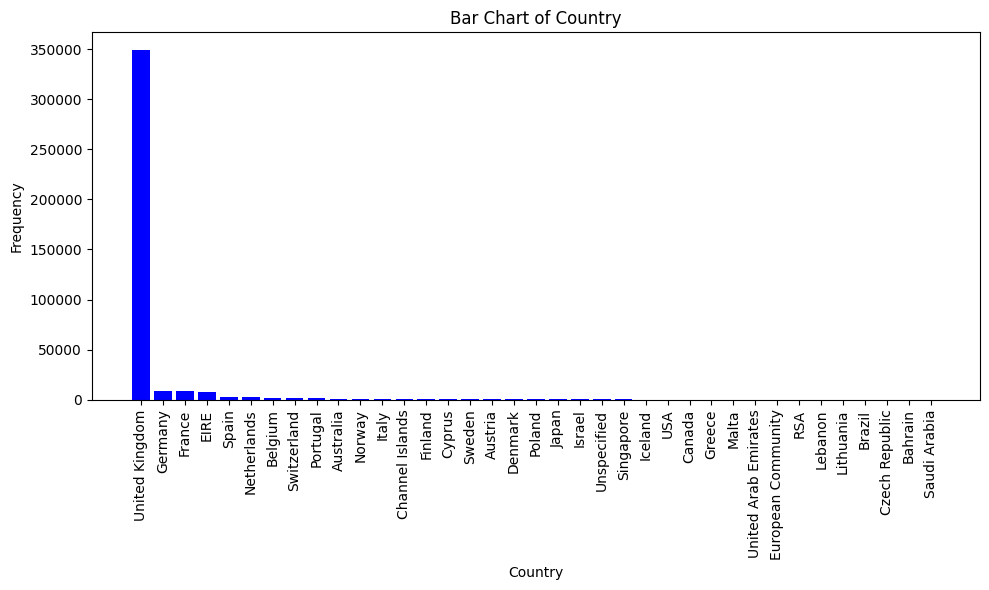

In [7]:
categorical_columns = ['Country'] 

for col in categorical_columns:
    if col in df.columns:
        freq_table = frequency_table(df, col)
        print(f"Frequency Table for '{col}':")
        print(freq_table)
        plot_bar_chart(freq_table, col)
    else:
        print(f"Column '{col}' not found in the dataset.")


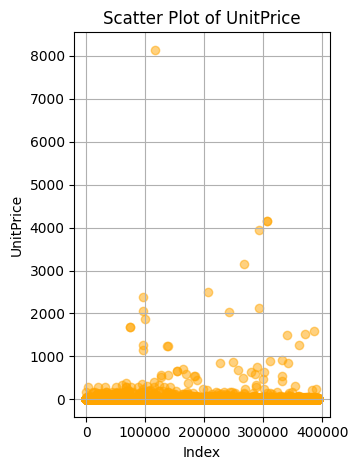

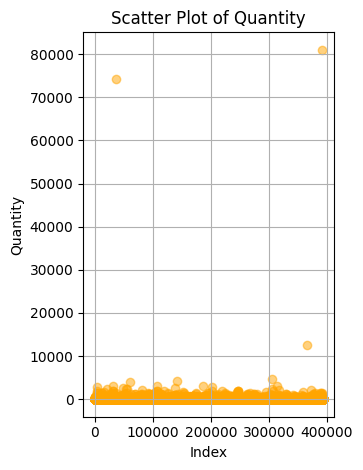

In [8]:
# Focus on UnitPrice and Quantity
columns_to_analyze = ['UnitPrice', 'Quantity']

for col in columns_to_analyze:
    if col in df.columns:
        plot_scatter(df, col)
        plt.tight_layout()
        plt.show()  # Show all plots for the current column
    else:
        print(f"Column '{col}' not found in the dataset.")

In [14]:
 # Calculate the number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f'Number of unique customers: {unique_customers}')

Number of unique customers: 4339


In [12]:
def eda_plots(df):
    """Generates EDA plots using Matplotlib."""
    customer_recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
    plt.figure(figsize=(10,6))
    sns.histplot(customer_recency['InvoiceDate'], kde=True)
    plt.title('Distribution of Recency')
    plt.show()

    top_customers = df.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='CustomerID', y='TotalAmount', data=top_customers)
    plt.title('Top 10 Customers by Monetary Value')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

    top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Description', y='Quantity', data=top_products)
    plt.title('Top 10 Products by Quantity Sold')
    plt.xticks(rotation=45, ha='right') 
    plt.show()

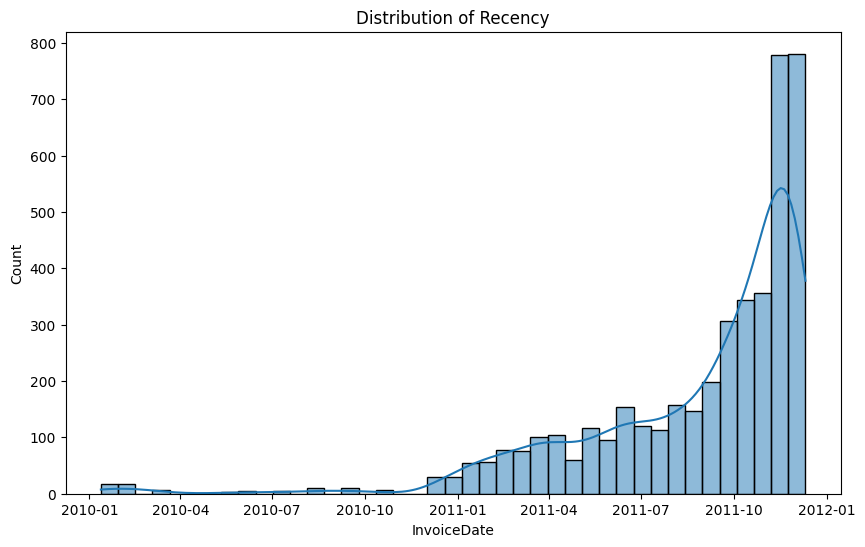

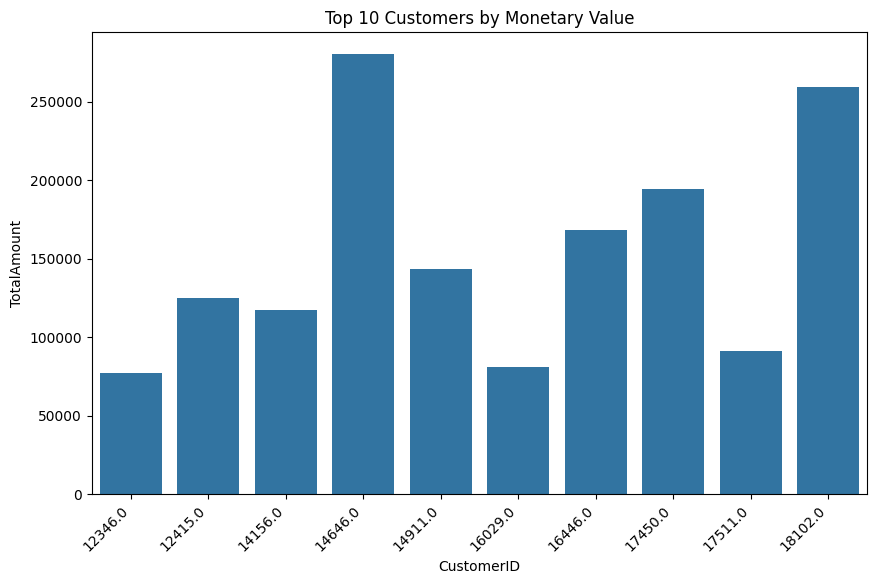

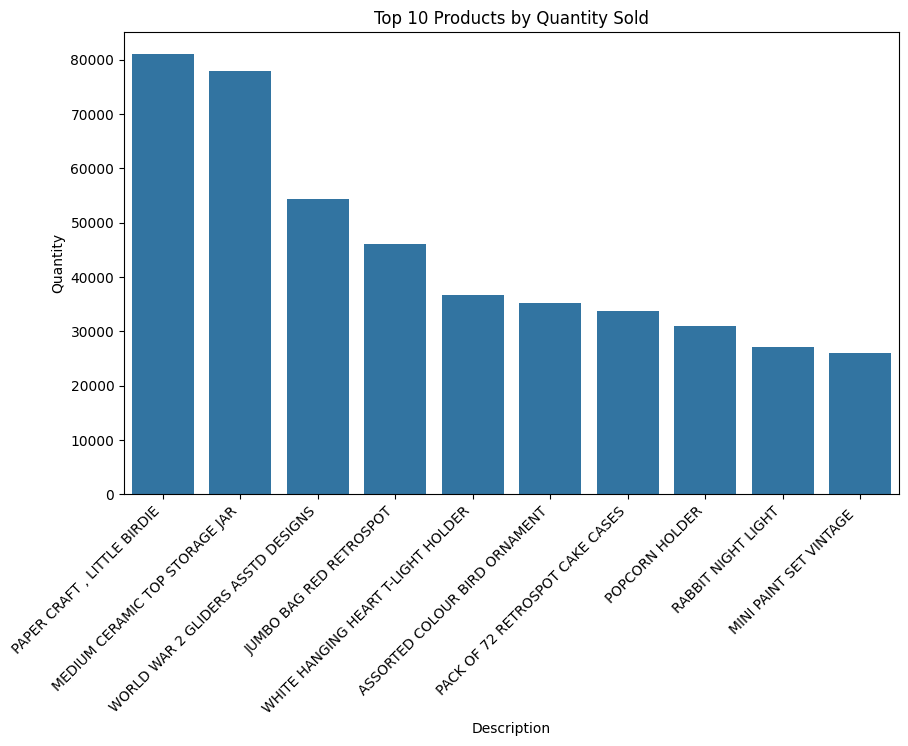

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
eda_plots(df)